In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read dataset

In [ ]:
import pandas as pd

X_train = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sents.txt',  sep='\n', header=None, index_col=None)
X_train = X_train.iloc[:, 0]
y_train = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sentiments.txt',  sep='\n', header=None, index_col=None)
y_train_topic = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/topics.txt',  sep='\n', header=None, index_col=None)

X_dev = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/dev/sents.txt', sep='\n', header=None, index_col=None)
X_dev = X_dev.iloc[:, 0]
y_dev = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/dev/sentiments.txt', sep='\n', header=None, index_col=None)
y_dev_topic = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/dev/topics.txt',  sep='\n', header=None, index_col=None)


X_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/test/sents.txt',  sep='\n', header=None, index_col=None)
X_test = X_test.iloc[:, 0]
y_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/test/sentiments.txt',  sep='\n', header=None, index_col=None)
y_test_topic = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/test/topics.txt',  sep='\n', header=None, index_col=None)


y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()
y_train_topic = y_train_topic.values.flatten()
y_dev_topic = y_dev_topic.values.flatten()
y_test_topic = y_test_topic.values.flatten()

In [ ]:
X_train.head(10)

0                            slide giáo trình đầy đủ .
1       nhiệt tình giảng dạy , gần gũi với sinh viên .
2                 đi học đầy đủ full điểm chuyên cần .
3    chưa áp dụng công nghệ thông tin và các thiết ...
4    thầy giảng bài hay , có nhiều bài tập ví dụ ng...
5    giảng viên đảm bảo thời gian lên lớp , tích cự...
6    em sẽ nợ môn này , nhưng em sẽ học lại ở các h...
7    thời lượng học quá dài , không đảm bảo tiếp th...
8    nội dung môn học có phần thiếu trọng tâm , hầu...
9    cần nói rõ hơn bằng cách trình bày lên bảng th...
Name: 0, dtype: object

# Naive Bayes 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(analyzer='word', ngram_range=(2,2))
tf_idf.fit(X_train)

X_train_encoded = tf_idf.transform(X_train)
X_dev_encoded = tf_idf.transform(X_dev)
X_test_encoded = tf_idf.transform(X_test)


In [ ]:
print(y_train_topic)

[1 0 1 ... 0 0 0]


In [ ]:
X_train_encoded.shape

(11426, 31384)

##Sentiment

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB()
model1.fit(X_train_encoded, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_dev = model1.predict(X_dev_encoded)
y_pred_test = model1.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.84      0.92      0.88      1409
     neutral       0.00      0.00      0.00       167
    positive       0.88      0.91      0.90      1590

    accuracy                           0.86      3166
   macro avg       0.58      0.61      0.59      3166
weighted avg       0.82      0.86      0.84      3166



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Topic

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train_encoded, y_train_topic)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_topic_pred_dev = model2.predict(X_dev_encoded)
y_topic_pred_test = model2.predict(X_test_encoded)
from sklearn.metrics import classification_report
target_names = ['Lecturer', 'Curriculum', 'Facility', 'others']
print(classification_report(y_test_topic, y_topic_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Lecturer       0.77      1.00      0.87      2290
  Curriculum       0.79      0.21      0.33       572
    Facility       1.00      0.37      0.54       145
      others       0.00      0.00      0.00       159

    accuracy                           0.78      3166
   macro avg       0.64      0.39      0.43      3166
weighted avg       0.75      0.78      0.71      3166



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Logictis Regression

##Sentiment

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_encoded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_dev = model1.predict(X_dev_encoded)
y_pred_test = model1.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.81      0.95      0.88      1409
     neutral       0.60      0.05      0.10       167
    positive       0.93      0.87      0.90      1590

    accuracy                           0.86      3166
   macro avg       0.78      0.62      0.62      3166
weighted avg       0.86      0.86      0.84      3166



##Topic

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train_encoded, y_train_topic)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_topic_pred_dev = model2.predict(X_dev_encoded)
y_topic_pred_test = model2.predict(X_test_encoded)
from sklearn.metrics import classification_report
target_names = ['Lecturer', 'Curriculum', 'Facility', 'others']
print(classification_report(y_test_topic, y_topic_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Lecturer       0.85      0.97      0.91      2290
  Curriculum       0.75      0.60      0.67       572
    Facility       0.98      0.68      0.80       145
      others       0.82      0.11      0.20       159

    accuracy                           0.84      3166
   macro avg       0.85      0.59      0.64      3166
weighted avg       0.84      0.84      0.82      3166



#SVM

##Sentiment

In [ ]:
from sklearn import svm
model1 = svm.SVC()
model1.fit(X_train_encoded, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_dev = model1.predict(X_dev_encoded)
y_pred_test = model1.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.81      0.95      0.88      1409
     neutral       0.67      0.07      0.13       167
    positive       0.92      0.86      0.89      1590

    accuracy                           0.86      3166
   macro avg       0.80      0.63      0.63      3166
weighted avg       0.86      0.86      0.85      3166



##Topic

In [ ]:
model2 = svm.SVC()
model2.fit(X_train_encoded, y_train_topic)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_topic_pred_dev = model2.predict(X_dev_encoded)
y_topic_pred_test = model2.predict(X_test_encoded)
from sklearn.metrics import classification_report
target_names = ['Lecturer', 'Curriculum', 'Facility', 'others']
print(classification_report(y_test_topic, y_topic_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Lecturer       0.84      0.97      0.90      2290
  Curriculum       0.77      0.54      0.63       572
    Facility       0.98      0.72      0.83       145
      others       0.65      0.16      0.26       159

    accuracy                           0.84      3166
   macro avg       0.81      0.60      0.66      3166
weighted avg       0.83      0.84      0.82      3166



# Gensim - Build simple word embedding

In [ ]:
pip install gensim

In [ ]:
pip install pyvi

In [ ]:
from pyvi import ViTokenizer

sentences = X_train.values

tokenized_sentences = []

for s in sentences:
    tokenized_sentences.append(ViTokenizer.tokenize(s).split())

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

w2v_model = Word2Vec(min_count=20, window=2, size=300)
w2v_model.build_vocab(tokenized_sentences)

In [ ]:
w2v_model.train(tokenized_sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(2134009, 3851460)

In [ ]:
w2v_model.wv.vocab

In [ ]:
w2v_model.wv.most_similar(positive=["giảng_dạy", "đồ_án"], negative=["kiểm_tra"], topn=1)

[('thái_độ', 0.4018787741661072)]

In [ ]:
w2v_model.wv.save_word2vec_format('w2v_vsfc.txt', binary=False)

In [ ]:
print(w2v_model['dạy'])

[-0.42708403  0.07445538 -0.04411411 -0.47181442 -0.2134336   0.6281002
  0.21444178 -0.29006228 -0.3117757  -0.03807165 -0.14678589  0.4533726
 -0.6762346  -0.66237235 -0.26767838 -0.5667023  -0.2950392   0.09185568
  0.10606465  0.33412957  0.50765496  0.61676055 -0.02084394  0.32826817
  0.18109238  0.01132492  0.10198927 -0.07249711  0.16204132 -0.51741
 -0.09100675  0.12178203 -0.15505698 -0.02578353  0.14996308 -0.05986993
  0.41677228 -0.02423351  0.05576582  0.14291471 -0.16363423 -0.47598636
  0.3773029  -0.3079837   0.16310608  0.43489632 -0.08791956  0.18114191
  0.4711848  -0.14813364  0.1616567   0.06054015  0.25770822  0.09204377
  0.24757017 -0.3798137  -0.29665282  0.2376459  -0.01592735  0.05235772
 -0.09334402  0.07207152  0.18745327 -0.3240077  -0.05941153  0.29323295
 -0.60213363 -0.2837838   0.4041973  -0.10896737 -0.12923975  0.02528441
  0.16737418 -0.12820815  0.05663207 -0.06073336  0.36384785  0.07149682
  0.36956125 -0.47528568  0.04575323  0.05450787 -0.5030

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# Word embeding 

In [ ]:
pip install pyvi

In [ ]:
# make vocabulary 
from pyvi import ViTokenizer

V = []

for t in X_train:
    tokenized_sentence = ViTokenizer.tokenize(t)
    V = V + tokenized_sentence.split()

V = list(set(V))

In [ ]:
len(V)

3704

## Cach 1: Tu build 

In [ ]:
# Building dictionary 
word_to_index = {w : (i+2) for i, w in enumerate(V)}

word_to_index['UNK'] = 1
word_to_index['PAD'] = 0

# Build index2w
index_to_word = {i: w for w, i in word_to_index.items()}

In [ ]:
word_to_index

{'giảng_đường': 2,
 'điểm_cao': 3,
 'hi_hi_đồ': 4,
 'hội_thảo': 5,
 'chú_trọng': 6,
 'quy_định': 7,
 'lẹ': 8,
 'hát': 9,
 'ưu_tiên': 10,
 'bước': 11,
 'giải_thuật': 12,
 'thời_sự': 13,
 'wzjwz307': 14,
 'thành_tích': 15,
 'thảm_họa': 16,
 'khoa': 17,
 '245': 18,
 'truy_cập': 19,
 'chuyên_nghiệp': 20,
 'cdio': 21,
 'tăng_tốc_độ': 22,
 'tác_động': 23,
 'cơ_hội': 24,
 'bó': 25,
 'thực_tại': 26,
 'giàng': 27,
 'wzjwz153': 28,
 'khâm_phục': 29,
 'chép': 30,
 'vuông': 31,
 'ý_muốn': 32,
 'home': 33,
 'giữ': 34,
 'một': 35,
 'mạch': 36,
 'giãng': 37,
 'cọ': 38,
 'trạng': 39,
 'kỳ': 40,
 'kiểm_chứng': 41,
 'giấc': 42,
 'nổi_nóng': 43,
 'khung': 44,
 'khảo_sát': 45,
 'thấm': 46,
 'dầy': 47,
 'màn_hình': 48,
 'song_ngữ': 49,
 'kiêm': 50,
 '85': 51,
 'tham_khảo': 52,
 'phích': 53,
 'vặt': 54,
 'như_ý': 55,
 'một_mạch': 56,
 'wzjwz281': 57,
 'toán_học': 58,
 'có_điều': 59,
 'chửi': 60,
 'phức_tạp_hóa': 61,
 'lịch_sử': 62,
 'rễ': 63,
 'nà': 64,
 'kém': 65,
 'ước_tính': 66,
 'sưu_tầm': 67,
 'chậm': 

In [ ]:
X_train.values

array(['slide giáo trình đầy đủ .',
       'nhiệt tình giảng dạy , gần gũi với sinh viên .',
       'đi học đầy đủ full điểm chuyên cần .', ...,
       'giao bài tập quá nhiều .', 'giáo viên dạy dễ hiểu , nhiệt tình .',
       'gói gọn doubledot hay , tận tình , phù hợp với mọi trình độ cũng như nhu cầu môn học .'],
      dtype=object)

In [ ]:
from pyvi import ViTokenizer

ViTokenizer.tokenize("slide giáo trình đầy đủ ")

'slide giáo_trình đầy_đủ'

In [ ]:
t = "slide giáo_trình đầy_đủ"
t.split()

['slide', 'giáo_trình', 'đầy_đủ']

In [ ]:
word_to_index['đầy_đủ']

3405

In [ ]:
t_encode = [1996, 1097,  3242, 0, 0 ,0, 0 ]

In [ ]:
word_to_index["PAD"]

0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer

max_len = 100

def encoding(X):
    sentences = []
    
    for t in X:
        # tach tu 
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = []
    for s in sentences:
        sent = []
        for w in s.split():
            try:
                sent.append(word_to_index[w])
            except:
                sent.append(word_to_index["UNK"])
        X.append(sent)
    
    # Padding du lieu theo do dai cau (maxlen)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

    return X

In [ ]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

In [ ]:
X_train_encoded

array([[ 462, 3326, 3405, ...,    0,    0,    0],
       [1975, 1151, 1561, ...,    0,    0,    0],
       [1089, 2727, 3405, ...,    0,    0,    0],
       ...,
       [2247,  830,  957, ...,    0,    0,    0],
       [2530, 1925, 3027, ...,    0,    0,    0],
       [ 818, 2066,  360, ...,    0,    0,    0]], dtype=int32)

##Sentiment

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_to_index)
input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words+1,
                    output_dim=300,
                    input_length=max_len)(input)
flat = Flatten()(emb)
output = Dense(3, activation="sigmoid")(flat)

model = Model(input, output)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          1112100   
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 90003     
Total params: 1,202,103
Trainable params: 1,202,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
          validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
          batch_size=128, epochs=10)


Epoch 1/10
90/90 [==============================] - 4s 41ms/step - loss: 0.3693 - binary_accuracy: 0.8385 - val_loss: 0.2326 - val_binary_accuracy: 0.9143
Epoch 2/10
90/90 [==============================] - 3s 39ms/step - loss: 0.1902 - binary_accuracy: 0.9355 - val_loss: 0.1856 - val_binary_accuracy: 0.9332
Epoch 3/10
90/90 [==============================] - 3s 38ms/step - loss: 0.1510 - binary_accuracy: 0.9482 - val_loss: 0.1749 - val_binary_accuracy: 0.9368
Epoch 4/10
90/90 [==============================] - 3s 39ms/step - loss: 0.1259 - binary_accuracy: 0.9584 - val_loss: 0.1736 - val_binary_accuracy: 0.9375
Epoch 5/10
90/90 [==============================] - 3s 39ms/step - loss: 0.1066 - binary_accuracy: 0.9645 - val_loss: 0.1715 - val_binary_accuracy: 0.9379
Epoch 6/10
90/90 [==============================] - 3s 38ms/step - loss: 0.0903 - binary_accuracy: 0.9718 - val_loss: 0.1793 - val_binary_accuracy: 0.9383
Epoch 7/10
90/90 [==============================] - 3s 39ms/step - los

In [ ]:
import numpy as np
y_pred_test = model.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.89      0.92      0.91      1409
     neutral       0.58      0.27      0.37       167
    positive       0.90      0.93      0.91      1590

    accuracy                           0.89      3166
   macro avg       0.79      0.71      0.73      3166
weighted avg       0.88      0.89      0.88      3166



##Topic

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_to_index)
input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words+1,
                    output_dim=300,
                    input_length=max_len)(input)
flat = Flatten()(emb)
output = Dense(4, activation="sigmoid")(flat)

model = Model(input, output)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          1112100   
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 120004    
Total params: 1,232,104
Trainable params: 1,232,104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train_topic, num_classes=4), 
          validation_data=(X_dev_encoded, to_categorical(y_dev_topic, num_classes=4)), 
          batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 39ms/step - loss: 0.3022 - binary_accuracy: 0.8723 - val_loss: 0.2094 - val_binary_accuracy: 0.9128
Epoch 2/10
90/90 [==============================] - 3s 37ms/step - loss: 0.1772 - binary_accuracy: 0.9306 - val_loss: 0.1654 - val_binary_accuracy: 0.9338
Epoch 3/10
90/90 [==============================] - 3s 37ms/step - loss: 0.1344 - binary_accuracy: 0.9507 - val_loss: 0.1553 - val_binary_accuracy: 0.9371
Epoch 4/10
90/90 [==============================] - 3s 37ms/step - loss: 0.1107 - binary_accuracy: 0.9606 - val_loss: 0.1552 - val_binary_accuracy: 0.9365
Epoch 5/10
90/90 [==============================] - 3s 37ms/step - loss: 0.0926 - binary_accuracy: 0.9678 - val_loss: 0.1579 - val_binary_accuracy: 0.9362
Epoch 6/10
90/90 [==============================] - 3s 37ms/step - loss: 0.0776 - binary_accuracy: 0.9746 - val_loss: 0.1650 - val_binary_accuracy: 0.9338
Epoch 7/10
90/90 [==============================] - 3s 38ms/step - los

In [ ]:
import numpy as np
y_topic_pred_test = model.predict(X_test_encoded)
y_topic_pred_test = np.argmax(y_topic_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Lecturer', 'Curriculum', 'Facility', 'others']
print(classification_report(y_test_topic, y_topic_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Lecturer       0.93      0.92      0.92      2290
  Curriculum       0.70      0.77      0.73       572
    Facility       0.94      0.93      0.94       145
      others       0.52      0.37      0.43       159

    accuracy                           0.87      3166
   macro avg       0.77      0.75      0.76      3166
weighted avg       0.87      0.87      0.87      3166



## Cach 2: dung ham co san trong Keras 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100


word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train)

word_2_index = word_tokenizer.word_index
word_2_index['pad'] = 0
word_2_index['unk'] = -1


index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_2_index['pad'])

    return X

In [ ]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

In [ ]:
X_train_encoded

array([[ 120,   46,   52, ...,    0,    0,    0],
       [  14,    9,    3, ...,    0,    0,    0],
       [ 100,    7,  123, ...,    0,    0,    0],
       ...,
       [ 333,    8,   18, ...,    0,    0,    0],
       [  46,    2,    4, ...,    0,    0,    0],
       [1295,  505,  293, ...,    0,    0,    0]], dtype=int32)

##Sentiment

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_2_index)
input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words+1,
                    output_dim=300,
                    input_length=max_len)(input)
flat = Flatten()(emb)
output = Dense(3, activation="sigmoid")(flat)

model = Model(input, output)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 300)          747600    
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 90003     
Total params: 837,603
Trainable params: 837,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
          validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
          batch_size=128, epochs=10)


Epoch 1/10
90/90 [==============================] - 4s 38ms/step - loss: 0.3670 - binary_accuracy: 0.8369 - val_loss: 0.2375 - val_binary_accuracy: 0.9175
Epoch 2/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1921 - binary_accuracy: 0.9347 - val_loss: 0.1876 - val_binary_accuracy: 0.9345
Epoch 3/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1558 - binary_accuracy: 0.9470 - val_loss: 0.1756 - val_binary_accuracy: 0.9385
Epoch 4/10
90/90 [==============================] - 3s 35ms/step - loss: 0.1341 - binary_accuracy: 0.9545 - val_loss: 0.1703 - val_binary_accuracy: 0.9398
Epoch 5/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1163 - binary_accuracy: 0.9619 - val_loss: 0.1733 - val_binary_accuracy: 0.9377
Epoch 6/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1005 - binary_accuracy: 0.9670 - val_loss: 0.1737 - val_binary_accuracy: 0.9402
Epoch 7/10
90/90 [==============================] - 3s 35ms/step - los

In [ ]:
import numpy as np
y_pred_test = model.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      0.93      0.91      1409
     neutral       0.60      0.17      0.27       167
    positive       0.90      0.92      0.91      1590

    accuracy                           0.89      3166
   macro avg       0.80      0.68      0.70      3166
weighted avg       0.88      0.89      0.88      3166



##Topic

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_2_index)
input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words+1,
                    output_dim=300,
                    input_length=max_len)(input)
flat = Flatten()(emb)
output = Dense(4, activation="sigmoid")(flat)

model = Model(input, output)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 300)          747600    
_________________________________________________________________
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 120004    
Total params: 867,604
Trainable params: 867,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train_topic, num_classes=4), 
          validation_data=(X_dev_encoded, to_categorical(y_dev_topic, num_classes=4)), 
          batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 38ms/step - loss: 0.2927 - binary_accuracy: 0.8782 - val_loss: 0.2006 - val_binary_accuracy: 0.9150
Epoch 2/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1702 - binary_accuracy: 0.9322 - val_loss: 0.1594 - val_binary_accuracy: 0.9345
Epoch 3/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1341 - binary_accuracy: 0.9488 - val_loss: 0.1526 - val_binary_accuracy: 0.9368
Epoch 4/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1146 - binary_accuracy: 0.9579 - val_loss: 0.1532 - val_binary_accuracy: 0.9383
Epoch 5/10
90/90 [==============================] - 3s 34ms/step - loss: 0.0985 - binary_accuracy: 0.9653 - val_loss: 0.1556 - val_binary_accuracy: 0.9364
Epoch 6/10
90/90 [==============================] - 3s 34ms/step - loss: 0.0854 - binary_accuracy: 0.9711 - val_loss: 0.1615 - val_binary_accuracy: 0.9343
Epoch 7/10
90/90 [==============================] - 3s 34ms/step - los

In [ ]:
import numpy as np
y_topic_pred_test = model.predict(X_test_encoded)
y_topic_pred_test = np.argmax(y_topic_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Lecturer', 'Curriculum', 'Facility', 'others']
print(classification_report(y_test_topic, y_topic_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Lecturer       0.93      0.93      0.93      2290
  Curriculum       0.69      0.78      0.73       572
    Facility       0.94      0.87      0.90       145
      others       0.59      0.40      0.47       159

    accuracy                           0.87      3166
   macro avg       0.79      0.74      0.76      3166
weighted avg       0.87      0.87      0.87      3166



# Pre-trained Embedding 

In [ ]:
pip install pyvi

In [ ]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open('/content/drive/MyDrive/Download(Win11)/W2V_ner.vec/W2V_ner.vec')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train.values)
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

    return X

In [ ]:
import numpy as np 
# first create a matrix of zeros, this is our embedding matrix
num_words = len(word_to_index)

embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

##Sentiment

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_to_index)

input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_len,
                    trainable=True)(input)
flat = Flatten()(emb)
output = Dense(3, activation="sigmoid")(flat)

model = Model(input, output)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 100, 300)          747300    
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 90003     
Total params: 837,303
Trainable params: 837,303
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
          validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 38ms/step - loss: 0.8702 - binary_accuracy: 0.7589 - val_loss: 0.3510 - val_binary_accuracy: 0.8764
Epoch 2/10
90/90 [==============================] - 3s 36ms/step - loss: 0.2570 - binary_accuracy: 0.9055 - val_loss: 0.2303 - val_binary_accuracy: 0.9099
Epoch 3/10
90/90 [==============================] - 3s 36ms/step - loss: 0.2141 - binary_accuracy: 0.9222 - val_loss: 0.3225 - val_binary_accuracy: 0.8490
Epoch 4/10
90/90 [==============================] - 3s 36ms/step - loss: 0.2821 - binary_accuracy: 0.9320 - val_loss: 0.2369 - val_binary_accuracy: 0.9061
Epoch 5/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1803 - binary_accuracy: 0.9411 - val_loss: 0.2310 - val_binary_accuracy: 0.9255
Epoch 6/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1499 - binary_accuracy: 0.9486 - val_loss: 0.1969 - val_binary_accuracy: 0.9360
Epoch 7/10
90/90 [==============================] - 3s 36ms/step - los

In [ ]:
import numpy as np
y_pred_test = model.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.90      0.92      0.91      1409
     neutral       0.45      0.34      0.38       167
    positive       0.91      0.92      0.92      1590

    accuracy                           0.89      3166
   macro avg       0.75      0.72      0.74      3166
weighted avg       0.88      0.89      0.89      3166



##Topic

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_to_index)

input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_len,
                    trainable=True)(input)
flat = Flatten()(emb)
output = Dense(4, activation="sigmoid")(flat)

model = Model(input, output)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 100, 300)          747300    
_________________________________________________________________
flatten_5 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 120004    
Total params: 867,304
Trainable params: 867,304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train_topic, num_classes=4), 
          validation_data=(X_dev_encoded, to_categorical(y_dev_topic, num_classes=4)), batch_size=64, epochs=10)

Epoch 1/10
179/179 [==============================] - 5s 26ms/step - loss: 0.5306 - binary_accuracy: 0.8673 - val_loss: 0.2178 - val_binary_accuracy: 0.9093
Epoch 2/10
179/179 [==============================] - 4s 25ms/step - loss: 0.2391 - binary_accuracy: 0.9110 - val_loss: 0.2320 - val_binary_accuracy: 0.9289
Epoch 3/10
179/179 [==============================] - 4s 24ms/step - loss: 0.2001 - binary_accuracy: 0.9284 - val_loss: 0.1856 - val_binary_accuracy: 0.9261
Epoch 4/10
179/179 [==============================] - 4s 24ms/step - loss: 0.1626 - binary_accuracy: 0.9383 - val_loss: 0.2057 - val_binary_accuracy: 0.9226
Epoch 5/10
179/179 [==============================] - 4s 25ms/step - loss: 0.1441 - binary_accuracy: 0.9459 - val_loss: 0.1766 - val_binary_accuracy: 0.9308
Epoch 6/10
179/179 [==============================] - 5s 25ms/step - loss: 0.1253 - binary_accuracy: 0.9532 - val_loss: 0.2444 - val_binary_accuracy: 0.9190
Epoch 7/10
179/179 [==============================] - 4s 2

In [ ]:
import numpy as np
y_topic_pred_test = model.predict(X_test_encoded)
y_topic_pred_test = np.argmax(y_topic_pred_test, axis=-1)

In [ ]:

from sklearn.metrics import classification_report
target_names = ['Lecturer', 'Curriculum', 'Facility', 'others']
print(classification_report(y_test_topic, y_topic_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Lecturer       0.93      0.92      0.92      2290
  Curriculum       0.71      0.76      0.74       572
    Facility       0.93      0.85      0.89       145
      others       0.48      0.51      0.50       159

    accuracy                           0.87      3166
   macro avg       0.76      0.76      0.76      3166
weighted avg       0.87      0.87      0.87      3166



#Results comparison graph

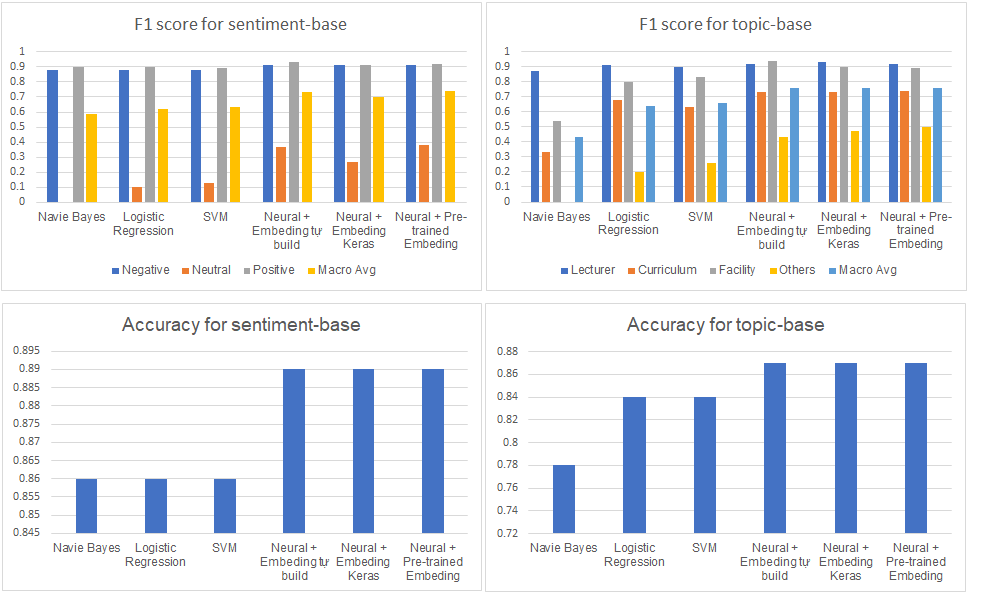